In [1]:
#import helper packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager


#source https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/

In [2]:
#import the outlier methods we want to run.
#be sure to have pyod installed!
from pyod.models.abod import ABOD


### Let's generate some fake data!

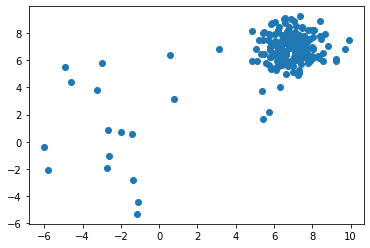

In [65]:
#make some sample data
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
X_train, X_test, y_train, y_test = generate_data(n_train=200, n_test = 200, n_features=2,
                                contamination = 0.1, behaviour = "new",
                                random_state = 5001)

# store outliers and inliers in different numpy arrays
train_outliers, train_inliers = get_outliers_inliers(X_train,y_train)
test_outliers, test_inliers = get_outliers_inliers(X_test,y_test)


plt.scatter(X_train[:,0], X_train[:,1])

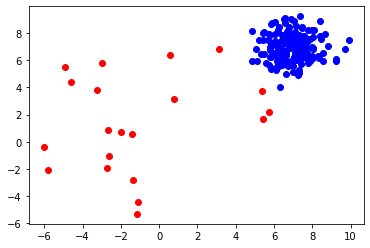

In [66]:
plt.scatter(train_inliers[:,0],train_inliers[:,1], c = "blue")
plt.scatter(train_outliers[:,0], train_outliers[:,1], c = "red")

#### Now let's look at the test data

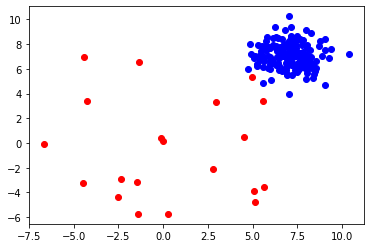

In [67]:
plt.scatter(test_inliers[:,0],test_inliers[:,1], c = "blue")
plt.scatter(test_outliers[:,0], test_outliers[:,1], c = "red")

### Let's do kNN nearest outlier detection!

In [68]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data

In [69]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]

In [70]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:1.0, precision @ rank n:1.0

On Test Data:
KNN ROC:0.9969, precision @ rank n:0.95


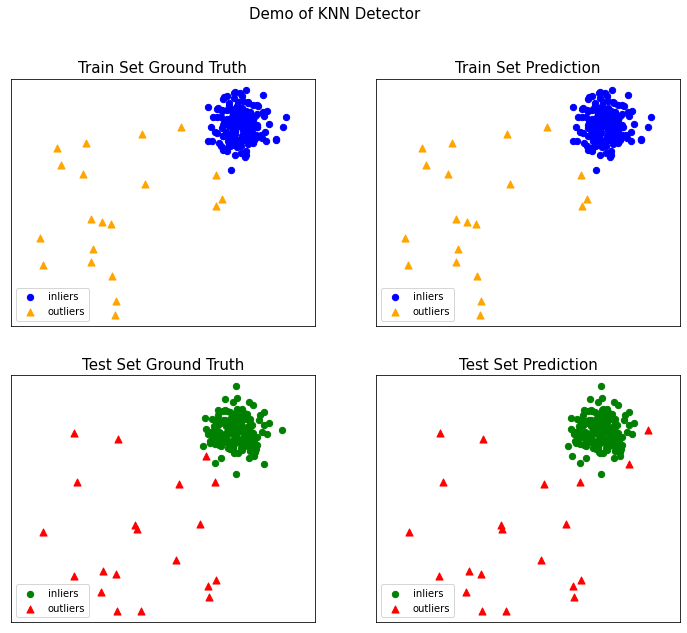

In [71]:
from pyod.utils.example import visualize
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

### Let's do an isolation forest!
-Don't know what it is? It's awesome. Take a read through!
https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/


On Training Data:
IForest ROC:0.9997, precision @ rank n:0.95

On Test Data:
IForest ROC:0.9958, precision @ rank n:0.95


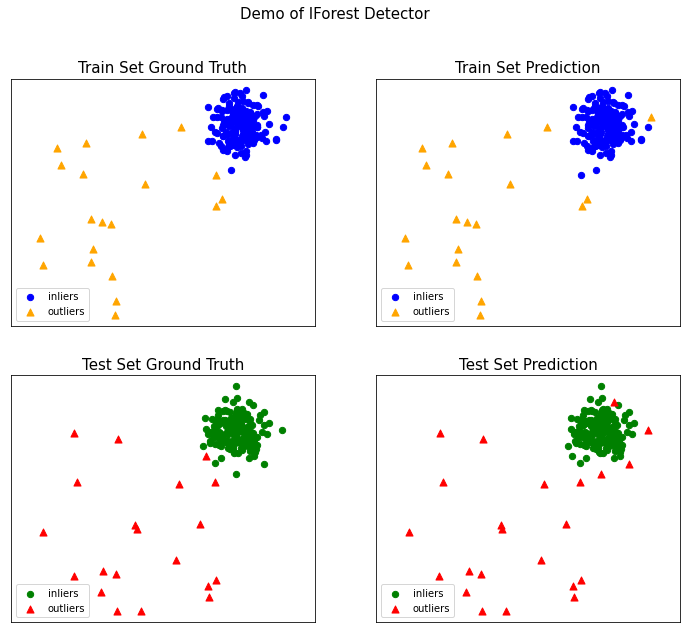

In [76]:
from pyod.models.iforest import IForest
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## Outlier Detection is hard.
- How hard? Really really hard. Here's the famous Big Sales Mart Data. Let's ASSUME that 5% are actually different. Here's how a bunch of different algos look like. 


In [77]:
import pandas as pd
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

df = pd.read_csv("https://code.datasciencedojo.com/tshrivas/dojoHub/raw/a152a17dee24dcfcc10bb75c77c2e88cdcf90212/Big%20Mart%20Sales%20DataSet/Train.csv")

In [78]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

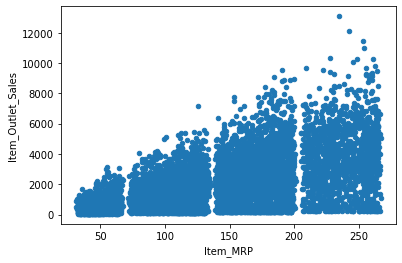

In [79]:
df.plot.scatter("Item_MRP", "Item_Outlet_Sales")

In [112]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [113]:
#Let's do some easy scaling!
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df[['Item_MRP', 'Item_Outlet_Sales']])


In [114]:
X

array([[0.92750715, 0.28358666],
       [0.0720684 , 0.03141895],
       [0.46828841, 0.15811486],
       ...,
       [0.22849221, 0.08885035],
       [0.30493925, 0.13883505],
       [0.18750976, 0.05610527]])

OUTLIERS :  447 INLIERS :  8076 Angle-based Outlier Detector (ABOD)


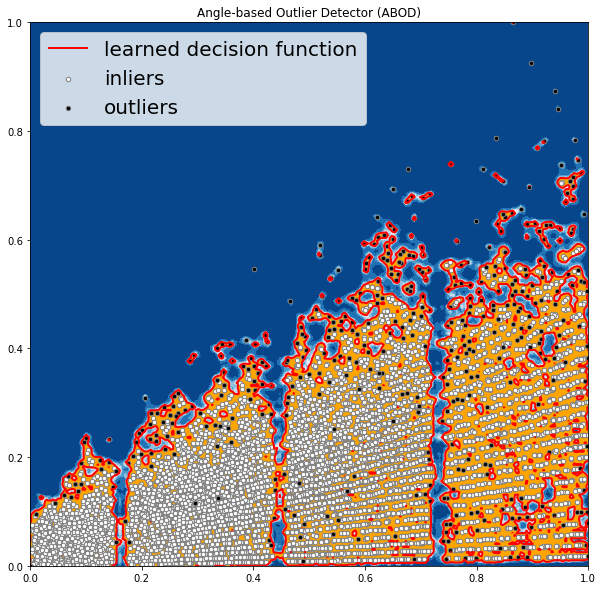

OUTLIERS :  427 INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


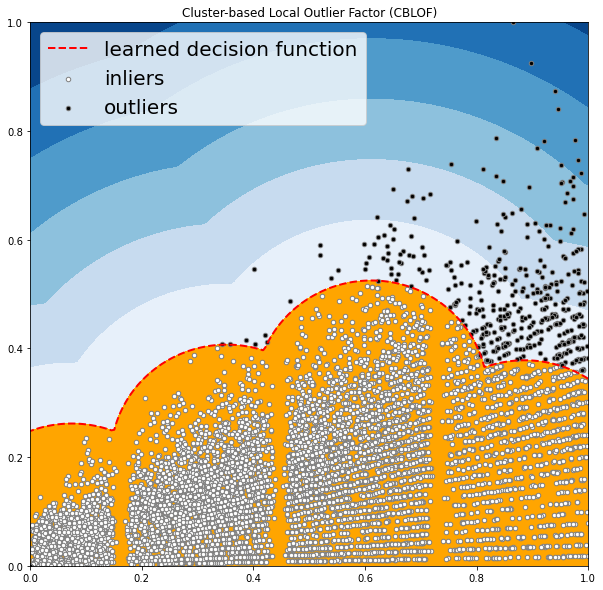

OUTLIERS :  376 INLIERS :  8147 Feature Bagging


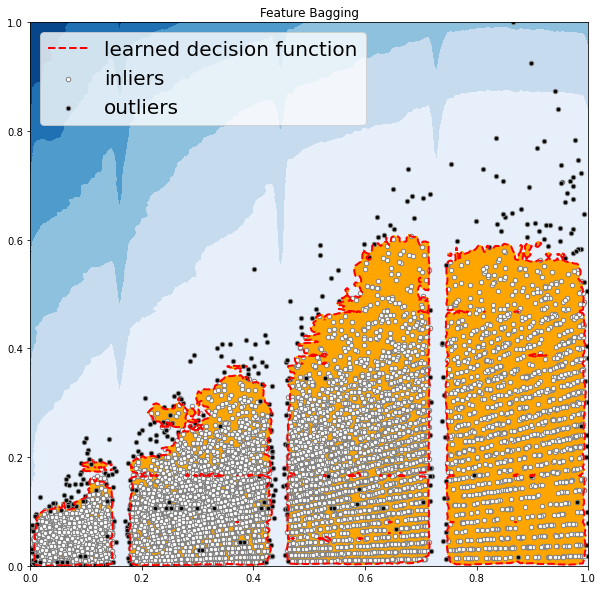

OUTLIERS :  501 INLIERS :  8022 Histogram-base Outlier Detection (HBOS)


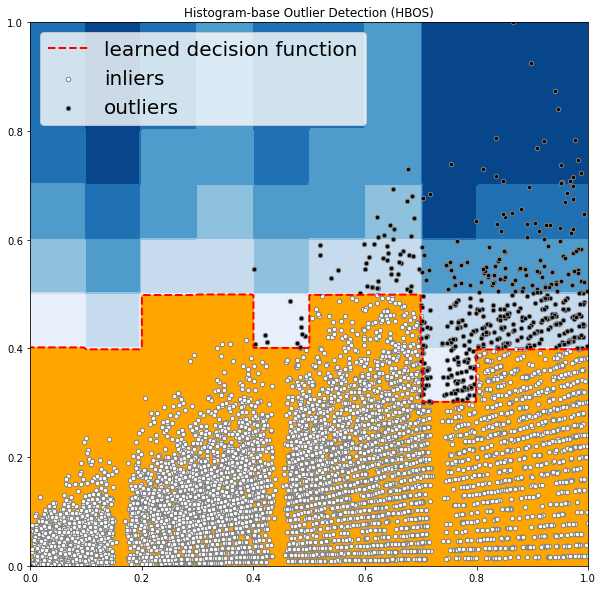

OUTLIERS :  427 INLIERS :  8096 Isolation Forest


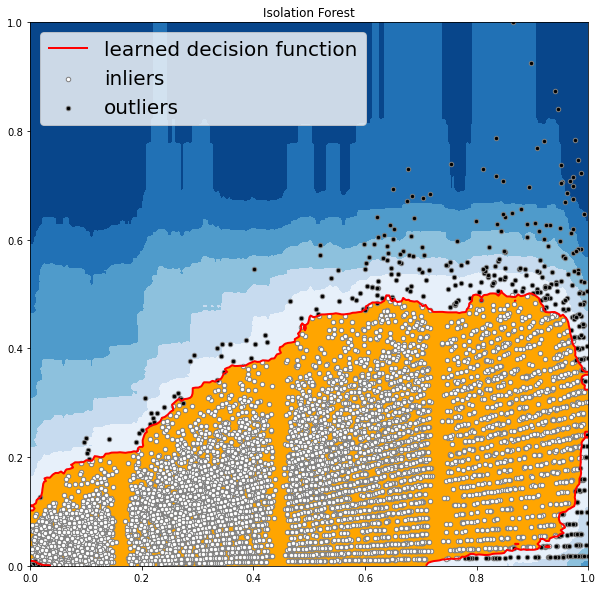

OUTLIERS :  311 INLIERS :  8212 K Nearest Neighbors (KNN)


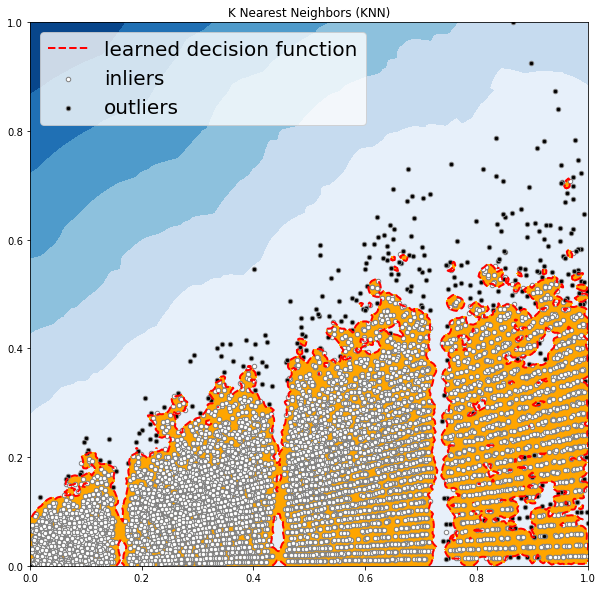

OUTLIERS :  176 INLIERS :  8347 Average KNN


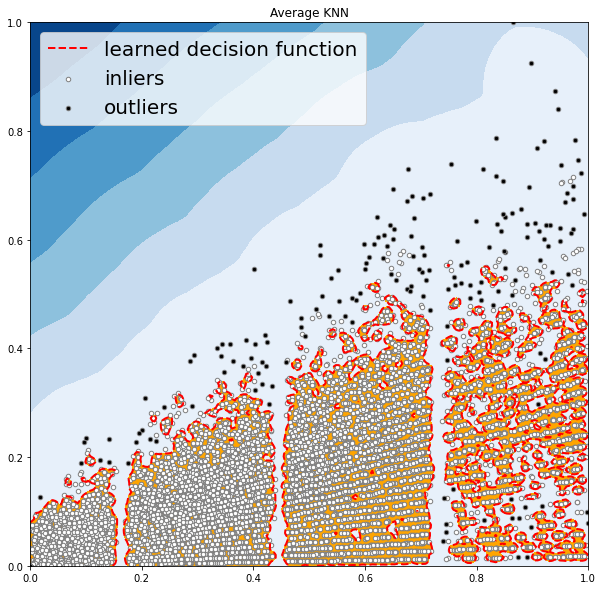

In [124]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X_new)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    #dfx = df
    #dfx['outlier'] = y_pred.tolist()
    outlier_prediction = y_pred.tolist()
    
    # IX1: inlier feature 1,  IX2: inlier feature 2
    IX1 =  np.multiply(X[:,0], np.equal(outlier_prediction, 0))
    IX2 =  np.multiply(X[:,1], np.equal(outlier_prediction, 0))
    
    # OX1: outlier feature 1, OX2: outlier feature 2
    OX1 =  np.multiply(X[:,0], np.equal(outlier_prediction, 1))
    OX2 =  np.multiply(X[:,1], np.equal(outlier_prediction, 1))
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor = "gray")
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor = "gray")
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()